# Course: Statistical Thinking in Python - Part 1
[Course link](https://www.datacamp.com/courses/statistical-thinking-in-python-part-1)


## Chapter 1: Graphical exploratory data analysis
[Slides](slides/Statistical Thinking in Python - Part 1/ch1_slides.pdf)

- Classic book [Exploratory Data Analysis](https://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey (1977)
- **Histograms**
- Be aware of "binning bias."  **Swarm plots** help mitigate this.
- **Empirical Cumulative Distribution Functions (ECDFs)**
  - Among the most important plots in statistical analysis. A good starting point in EDA.
  - Shows all the data & gives complete picture of how they are distributed.  

In [16]:
# A typical ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
# In seaborn:
seaborn.kdeplot(..., cumulative=True, ...)

- `np.arange([start,] stop, [step,] dtype=None)` - Return evenly spaced values within a given interval as an ndarray.

## Chapter 2: Quantitative exploratory data analysis
[Slides](slides/Statistical Thinking in Python - Part 1/ch2_slides.pdf)

- Focus: *Summary statistics*

- **mean**: `np.mean(...)`
- **median**: `np.median(...)` (not affected by outliers)
- **Box plots** show the 25th, 50th, and 75th quartiles in the box (when combined, this 50% is called the inter-quartile range [IQR]).  The whiskers extend to 1.5x the IQR or to the extent of the data.  (Box plots were invented by Tukey!)
- Outliers are often delimited as 2 IQRs away from the median!
- **variance**: [`np.var(...)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
- **std deviation**: `np.std(...)`
- **scatter plots**
- **Covariance** - A measure of how two quantities vary together. 
  - [`np.cov(...)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)
      - Returns a covariance matrix.  The diagonals contain the *variance* of a single variable.
  - mathematical definition: 
    - `covariance = mean of [ (x(i) - x(mean)) * (y(i) - y(mean)) ]`
- **Pearson correlation coefficient** - A "unitless" or "dimensionless" measure of covariance. 
  - `np.corrcoef(x, y=None, ...)`
  - mathematical definition: 
    - **`𝜌`** ` = covariance / (std of x) * (std of y)`
    - or:
    - **`𝜌`** ` = variability of the pairs due to codependence / independent variability of the data sets`
 

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

## Chapter 3: Thinking probabilistically-- Discrete variables
[Slides](slides/Statistical Thinking in Python - Part 1/ch3_slides.pdf)

Numpy `random` module:
- `np.random.random()` - Psuedo-random: the same seed will always produce the same result.
- `np.random.seed()`

Probability:
- **Statistical inference** - The process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again.  Actionable decisions can be made on these conclusions.
- **Probability** "precisely defines uncertainty."
  - The probability *p* of an event is the number of occurrences *n* divided by the number of samples.
  - `p = n/samples`
- **Probability Mass Function (PMF)** - The set of probabilities of *discrete* outcomes.
  - Example: One roll of a die has a "**discrete uniform** distribution."
- **Distribution** - A mathematical description of outcomes.
- **Binomial distribution** example is the outcome of one coin toss.
  - `np.random.binomial(n, p, size=m)`
  - The "story": The number of successes *r* in *n* Bernoulli trials with probability *p* of success is *binomially* distributed.  (With number of samples *m*.)
  - (A Bernoulli trial is just an event with a boolean outcome.)
- **Poisson process** - The timing of the next event is completely independent of when the previous event occurred.
  - The number of arrivals *r* of a Poisson process in a given time interval with average rate of *λ* arrivals
per interval is *Poisson distributed*.
  - **Poisson distribution** is a limit of (approximates) the Binomial distribution for *rare* events.  (An event is binary -- it either happens or doesn't.)
  - In other words: The Poisson distribution with arrival rate equal to *np* approximates a Binomial distribution for *n* Bernoulli trials with probability *p* of success (with *n* large and *p* small). 
  - `np.random.poisson()`



## Chapter 4: Thinking probabilistically-- Continuous variables
[Slides](slides/Statistical Thinking in Python - Part 1/ch4_slides.pdf)

- **Probability Density Function (PDF)** - The set of probabilities of *continuous* outcomes.
  - The probability is measured by the *area under the line* in a PDF.
- **Normal (or Guassian) distribution** - Describes a continuous variable whose PDF has a single symmetric peak.
  - `np.random.normal(mean, std)`
- **Exponential distribution**
  - : The *time between events* **τ** (tau) in a Poisson process is exponentially distributed.
  - `np.random.exponential(mean)`

---
# Course: Statistical Thinking in Python - Part 2
[Course link](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2)


## Chapter 1: Parameter estimation by optimization
[Slides](slides/Statistical Thinking in Python - Part 2/ch1_slides.pdf)

- **Optimal parameters** - Parameter values that bring the model in closest agreement with the data.
- **Least squares** - The *process* of finding the parameters for which the sum of the squares of the residuals (rise) is minimal.  Also known as RSS (for *residual sum of squares*).
  - `slope, intercept = np.polyfit(x_data, y_data, degree)`
  - (A line is a first-degree polynomial)
- Equation for a line: `y = ax + b`

## Chapter 2: Bootstrapping and confidence intervals
[Slides](slides/Statistical Thinking in Python - Part 2/ch2_slides.pdf)

- **Bootstrapping or Bootstrap sampling** - The use of *randomly* resampled data to perform statistical inference.
- **Bootstrap sample** - An array that was drawn from the original data with replacement.
- **Bootstrap replicate** - A statistic computed from a resampled array.
- `np.random.choice(a, size=None, ...)`
- **Confidence interval** - If we repeated measurements over and over again, **p%** of the observed values would lie within the **p%** confidence interval. 
  - `np.percentile(bs_replicates, [bottom%, top%])`
  - E.g. [2.5, 97.5] to get the 95th % confidence interval.
- **Standard error of the mean (SEM)** = `np.std(data) / np.sqrt(len(data))`
- **Nonparametric inference** - Makes no assumptions about the model or probability distribution underlying the data.
- **Pairs bootstrap** - Resampling done w/ two related values at a time.

## Chapter 3: Introduction to hypothesis testing
[Slides](slides/Statistical Thinking in Python - Part 2/ch3_slides.pdf)

- **Hypothesis testing** - Assessment of how reasonable the observed data are assuming a hypothesis is true.
- **Null hypothesis** - A general statement or default position that there is no relationship between two measured phenomena, or no association among groups.
- **Permutation** - Random *reordering* of entries in an array. (Vs. *random* sampling due in bootstrapping.)
  - In general, permutation tests are preferred to bootstrap sampling because they are exact and make use of all the data.
  - In the case of this course, when combining two separate arrays of PA and OH county voting shares to test the null hypothesis of the two states' voting patterns being identical.
  - `np.random.permutation(array)`
  - Also handy: `np.concatenate([control_array, treated_array])`
- **Permutation replicate** - A *single value* of a statistic *computed from a permutation sample*, such as a mean or std deviation.
- **Test statistic** - A single number that can be computed from *observed* data and from *simulated* data under the null hypothesis. 
  - It serves as a basis of comparison between the two and should be pertinent to the question you are seeking to answer in your hypothesis test.
  - Example: In testing whether PA and OH county voting shares are the same our test statistic is *the difference in mean vote share between the states*.
- **p-value** - The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true.
  - Note the p-value is meaningful only when *the null hypothesis is clearly stated* along with *the test statistic used to evaluate it*.
  - < 0.01 (some say < .05) is typically said to be "statistically significant," but don't fall into the trap of evaluating it to a simple yes or no.
- **Statistical significance** - Determined by the smallness of the p-value.
- **Null hypothesis significance testing (NHST)** - Another name for what we're doing here.

Steps in hypothesis testing:
1. Clearly state the null hypothesis 
1. Define your test statistic
1. Generate many sets of simulated data assuming the null hypothesis is true
1. Compute the test statistic for each simulated data set
1. The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

### Example of hypothesis testing via permutation 
"Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is *not* commensurate with the data. *Thereore July and November rainfall are not identically distributed*."


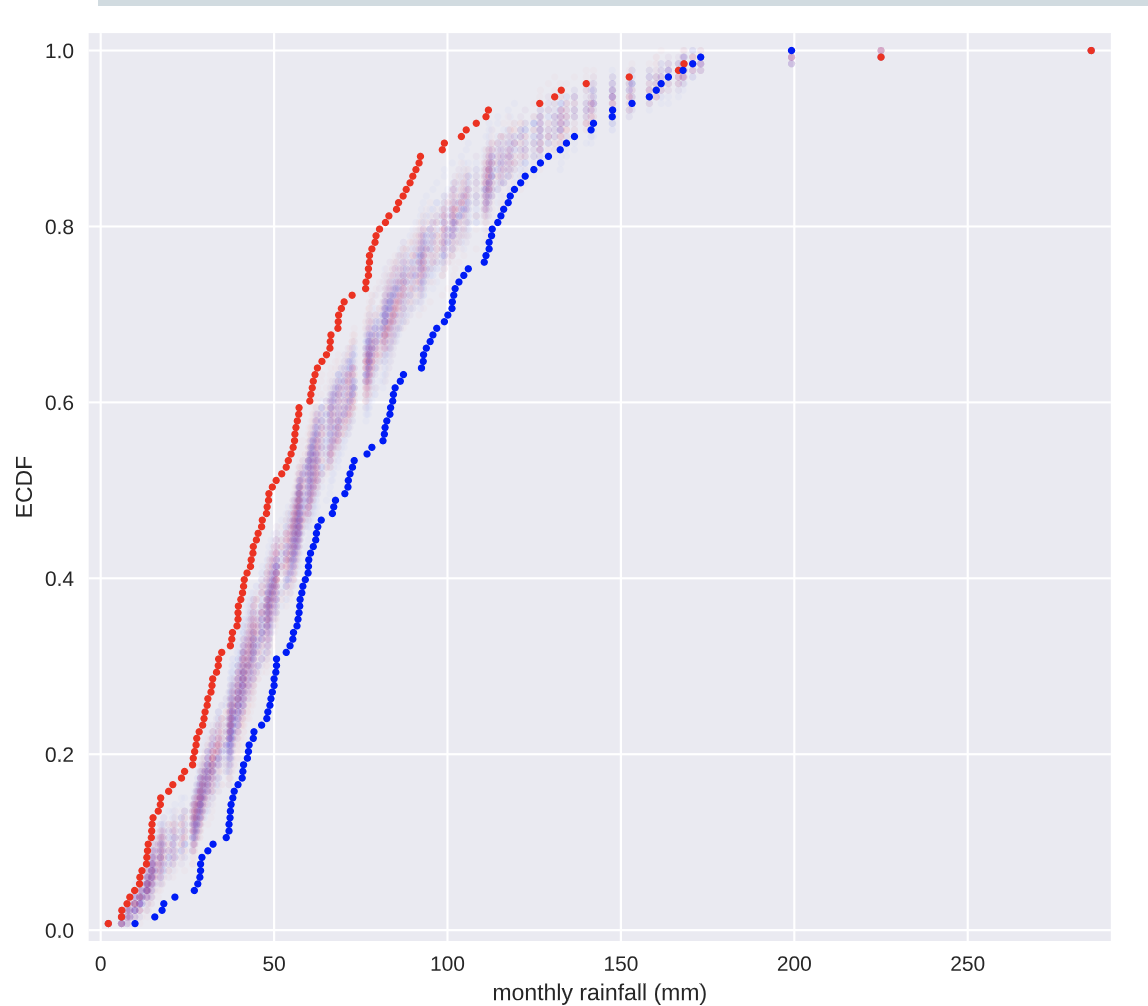

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('notes_files/Graph of hypothesis testing via permutation.png', width=500)

## Chapter 4: Hypothesis test examples
[Slides](slides/Statistical Thinking in Python - Part 2/ch4_slides.pdf)

From  [exercise 16](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/putting-it-all-together-a-case-study?ex=16):

>**Measuring heritability**

>Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This is because in evolutionary terms there is only a *one-way relationship between variables* -- the parent traits affects the offspring; the offspring traits cannot affect the parent.  The Pearson coeff. assumes a *two-way* relationship between variables!

>**This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately.** If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

---
# Course: Case Studies in Statistical Thinking

## Chapter 1: Fish sleep and bacteria growth: A review of Statistical Thinking I and II
[Slides](slides/Case Studies in Statistical Thinking/chapter1.pdf)

- [`dc_stat_think`](https://pypi.org/project/dc_stat_think/) module combines all the functions we built previously.
  - `pip install dc_stat_think`